<a href="https://colab.research.google.com/github/sahil8104852330/PRODIGY_DATA_STRUCTURE/blob/main/PRODIGY_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [13]:
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

Reading The Dataset

In [14]:
data = pd.read_csv("train.csv")

In [15]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Displaying the column names

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking Null Values

In [17]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling-in the data(Replacing The Nan Values)

In [18]:
data['Age'].fillna(data['Age'].median(), inplace=True)    #replacing Nan values with median
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)   #replacing Nan with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)       #replacing Nan with mode
data.drop(['Name'], axis=1, inplace=True)

Re-checking the null values.

In [19]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Visualising Data

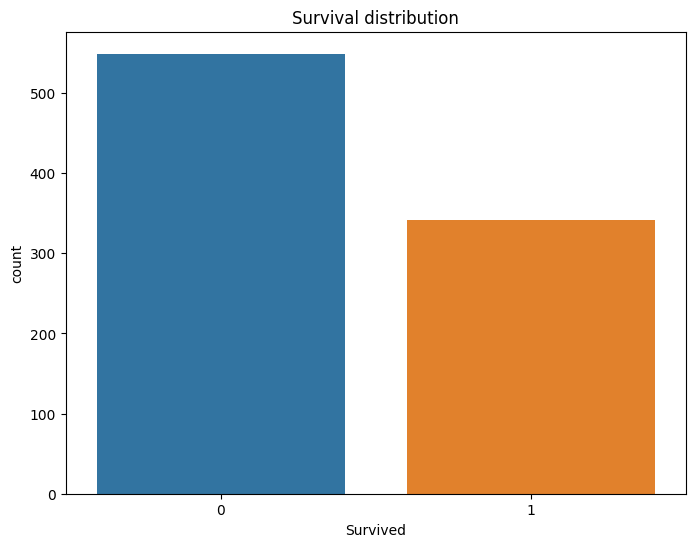

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',data=data)
plt.title("Survival distribution")
plt.show()

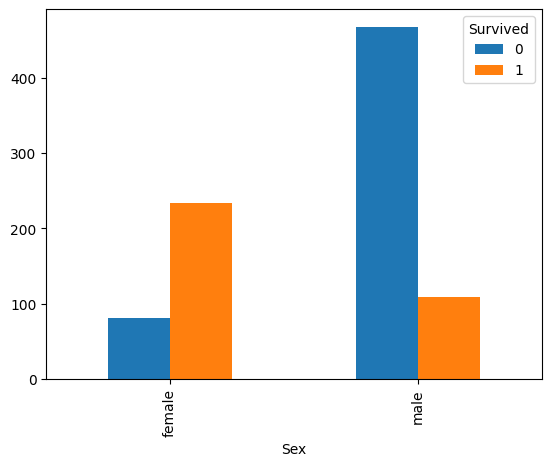

In [21]:
#Plotting Distribution of "Sex" with "Survived"
num = data.groupby(['Sex', 'Survived']).size().unstack()
num.plot(kind="bar")
plt.show()

In [22]:
#Calculating Survival rate by Pclass group
data['Pclass'] = pd.cut(data['Pclass'], bins=[0,1,2,3], labels=['First Class', 'Second Class', 'Third Class'])
survival_by_Pclassgroup = data.groupby('Pclass')['Survived'].mean()
(survival_by_Pclassgroup)

Pclass
First Class     0.629630
Second Class    0.472826
Third Class     0.242363
Name: Survived, dtype: float64

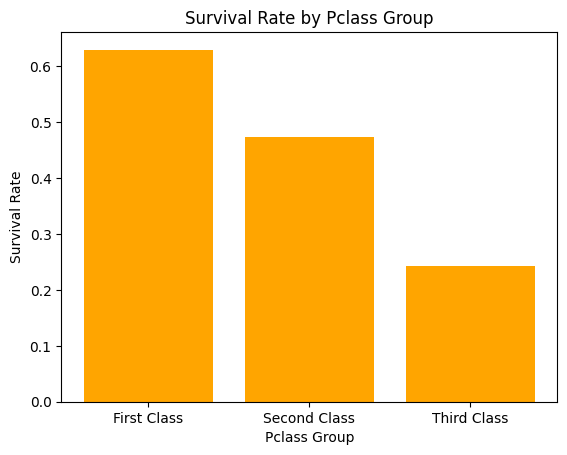

In [23]:
plt.bar(survival_by_Pclassgroup.index, survival_by_Pclassgroup.values,color="orange")
plt.xlabel('Pclass Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass Group')
plt.show()